# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [53]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

nome_pasta_resultado= 'resultados1'
raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{nome_pasta_resultado}"

df_gerador = pd.read_csv(f'{raiz}/resultado_geral_gerador.csv', sep=',', engine='python')
df_perf = pd.read_csv(f'{raiz}/resultado_geral_perf.csv', sep=',', engine='python')
df_sar = pd.read_csv(f'{raiz}/resultado_geral_sar.csv', sep=',', engine='python')

df = pd.concat([df_gerador,df_perf], sort = False)
print(df.columns)

format_imagens= '.jpg'


Index(['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'var_ip',
       'timeout', 'rx_packets', 'rx_packet_rate_avg', 'rx_packet_rate',
       'task_clock', 'context_switches', 'cpu_migrations', 'page_faults',
       'cycles', 'instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses', 'LLC_loads',
       'LLC_load_misses', 'L1_icache_load_misses', 'dTLB_loads',
       'dTLB_load_misses', 'iTLB_loads', 'iTLB_load_misses'],
      dtype='object')


In [3]:
lista_combined= [1,2,4,8]
lista_for= [0,100,200,400,800,1600,3200,6400,12800]
lista_hook_xdp= ['xdpgeneric','xdpdvr']
lista_pacotes= [64,128,256,512,1024,1500]

# Resultados do gerador

### As avaliações de ***Latência***, ***Vazão*** e ***uso de CPU*** serão avaliados em 4 grupos gerais:
#### 1. Número de filas TX/RX de processamento
#### 2. Tipos de hooks XDP
#### 3. Tamanho dos laços de repetição dos algoritmos
#### 4. Tamanho dos pacotes
---

## 1. Número de filas TX/RX de processamento

### 1.1 Qual a ***Vazão*** obtida ao aumentar as filas TX/RX de processamento?

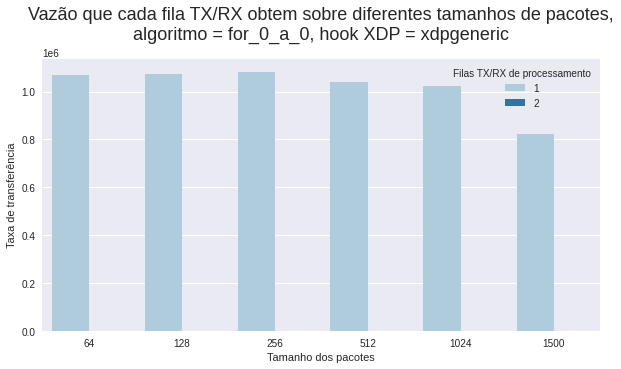

In [135]:
algoritmo= 'for_0_a_0'
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.algoritmo == algoritmo]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes tamanhos de pacotes,\nalgoritmo = {algoritmo}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Tamanho dos pacotes")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_packet_size@algoritmo_{algoritmo}_hook_ebpf_{hook_ebpf}{format_imagens}')

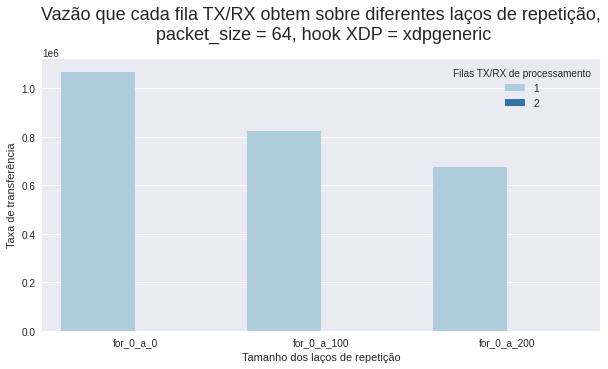

In [138]:
packet_size= 64
hook_ebpf= 'xdpgeneric'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes laços de repetição,\n packet_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Tamanho dos laços de repetição")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_algoritmo@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

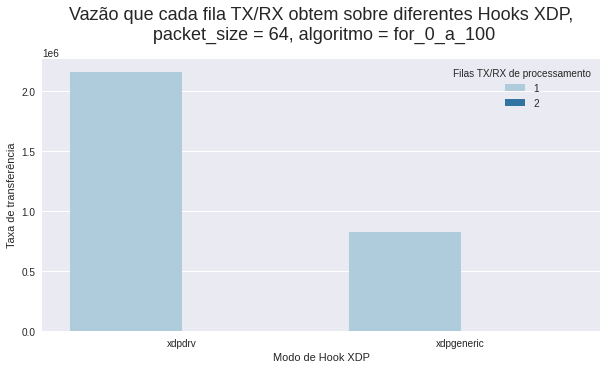

In [144]:
packet_size= 64
algoritmo= 'for_0_a_100'

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes Hooks XDP,\n packet_size = {packet_size}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Modo de Hook XDP")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_hook_ebpf@packet_size_{packet_size}_algoritmo_{algoritmo}{format_imagens}')

### 1.2 Qual a ***Latência*** obtida ao aumentar as filas TX/RX de processamento?

### 1.3 Qual o ***uso de CPU*** obtido ao aumentar as filas TX/RX de processamento?

Exemplos abaixo:

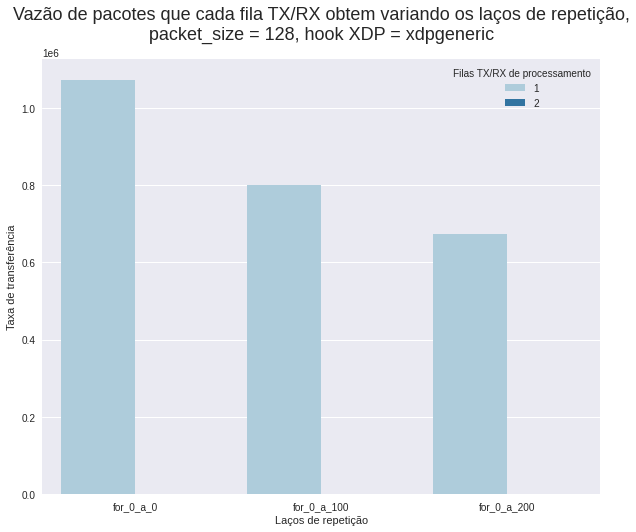

In [131]:
packet_size=128
hook_ebpf= 'xdpgeneric'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada fila TX/RX obtem variando os laços de repetição,\npacket_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Laços de repetição")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_algoritmo@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

### Qual o desempenho que cada **Hook eBPF/XDP** obtem nos diferentes laços de repetição?

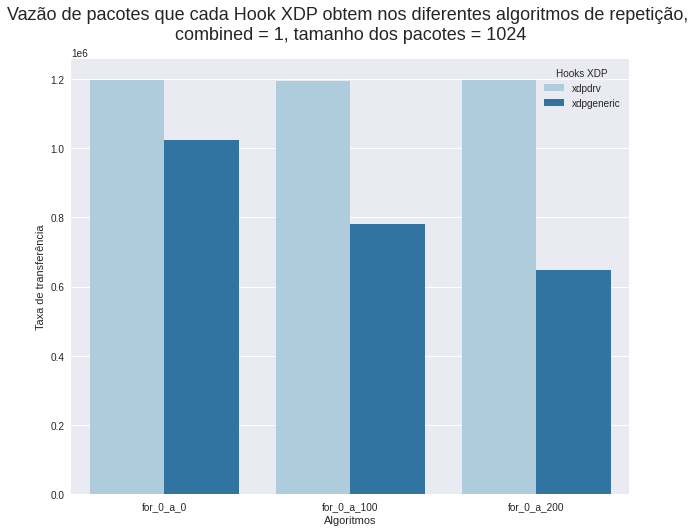

In [113]:
combined=1
packet_size= 1024

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.packet_size == packet_size]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem nos diferentes algoritmos de repetição, \ncombined = {combined}, tamanho dos pacotes = {packet_size}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Algoritmos')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_{hue}_para_dif_{eixo_x}@combined_{combined}_packet_size_{packet_size}{format_imagens}')

### 2. Qual o desempenho que cada **Hook eBPF/XDP** obtem ao processar diferentes tamanhos de pacotes?

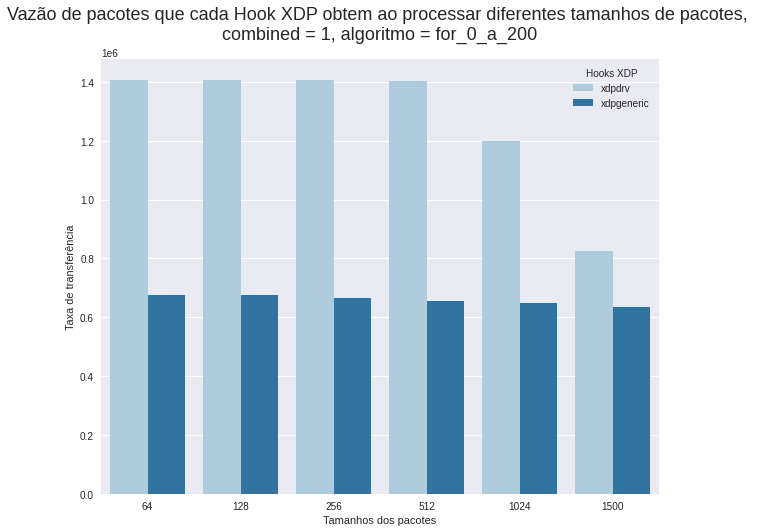

In [114]:
combined=1
algoritmo= 'for_0_a_200'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem ao processar diferentes tamanhos de pacotes, \ncombined = {combined}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Tamanhos dos pacotes')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_tam_packets@combined{combined}_algoritmo_{algoritmo}{format_imagens}')

### 3. Qual o desempenho que cada **Hook eBPF/XDP** processa pacotes variando a quantidade de filas TX/RX de processamento?

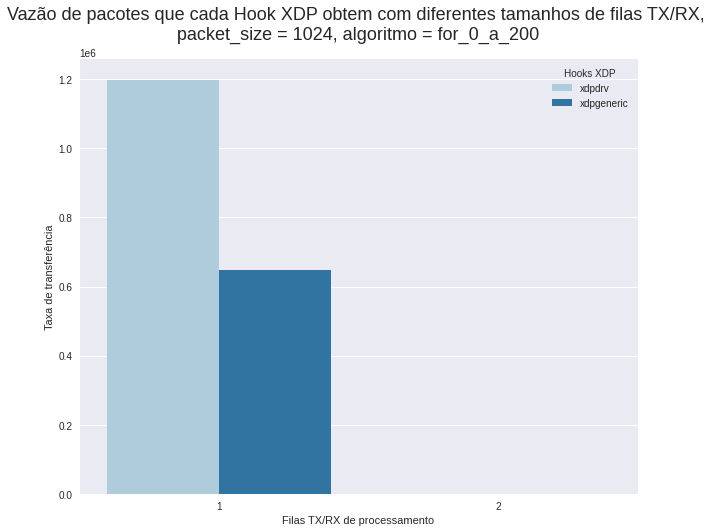

In [115]:
packet_size= 1024
algoritmo= 'for_0_a_200'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem com diferentes tamanhos de filas TX/RX, \npacket_size = {packet_size}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_combineds@packet_size{packet_size}_algoritmo_{algoritmo}{format_imagens}')

### 4. Qual o desempenho que cada **laço de repetição** obtem para diferentes tamanhos de pacotes?

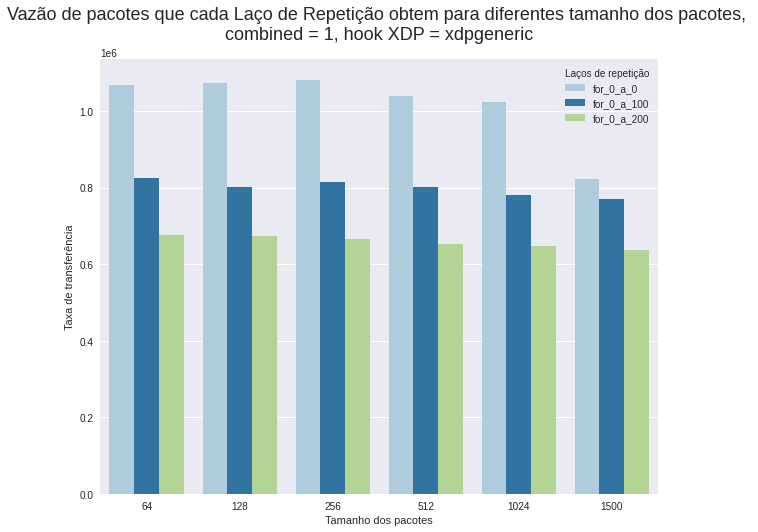

In [119]:
combined=1
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem para diferentes tamanho dos pacotes, \ncombined = {combined}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Tamanho dos pacotes')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_packet_size@combined_{combined}_hook_ebpf_{hook_ebpf}{format_imagens}')

2.3 Qual o desempenho que os **laço de repetição** obtem variando as filas tx/rx de processamento?

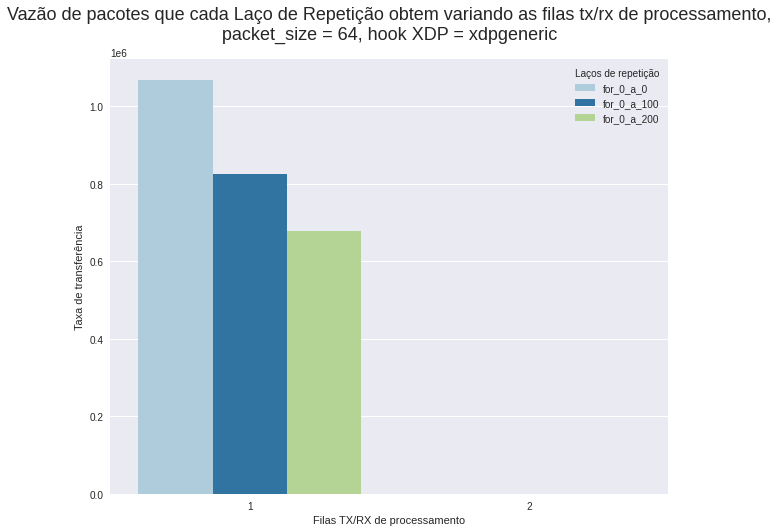

In [122]:
packet_size=64
hook_ebpf= 'xdpgeneric'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem variando as filas tx/rx de processamento,\npacket_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_combined@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

### 3. Qual o desempenho que cada **fila TX/RX de processamento** obtem no processamento de pacotes?

<ul>
  <li>3.1 Variando os Hooks XDP</li>
  <li>3.2 Variando os laços de repetição</li>
  <li>3.3 Variando o tamanho dos pacotes<</li>
</ul>

3.2 Qual o desempenho que cada tamanho de **fila TX/RX** obtem variando os laços de repetição?

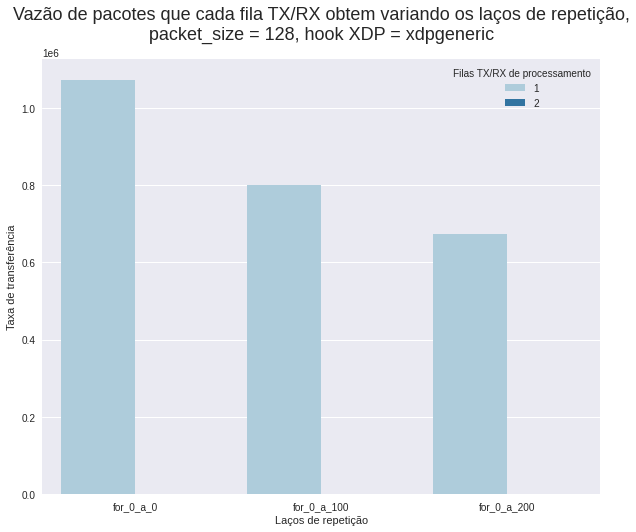

In [130]:
packet_size=128
hook_ebpf= 'xdpgeneric'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada fila TX/RX obtem variando os laços de repetição,\npacket_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Laços de repetição")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_algoritmo@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
combined=8
it_hook_ebpf= "xdpgeneric"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=1
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=2
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=4
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
it_combined=8
it_hook_ebpf= "xdpdrv"

plt.rc('figure', figsize=(20, 12))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1_combined{it_combined}_hook_{it_hook_ebpf}.pdf')

In [ ]:
#3.1.1 Qual a quantidade de pacotes processados variando o tamanho dos laços for e a quantidade de pacotes?
plt.rc('figure', figsize=(20, 12))
it_combined= 1
it_hook_ebpf= "xdpgeneric"
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados variando o tamanho do loop e o tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1.pdf')

### 3.2 Perguntas quanto a vazao dos pacotes

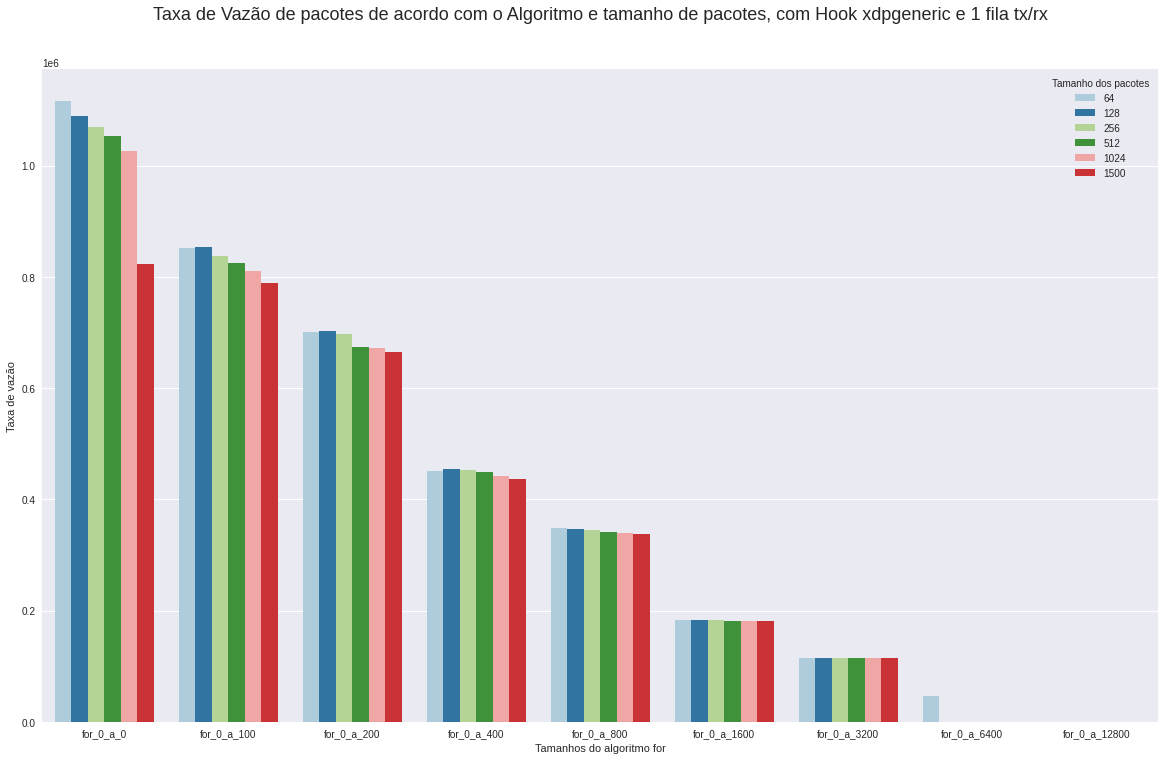

In [36]:
#3.2.1 Qual a taxa de vazão de pacotes variando o tamanho do loop e o tamanho dos pacotes?
plt.rc('figure', figsize=(20, 12))
it_combined= 1
it_hook_ebpf= "xdpgeneric"
df_pergunta2= df[df.combined == it_combined]
df_pergunta2= df_pergunta2[df_pergunta2.hook_ebpf == it_hook_ebpf]
df_pergunta2= df_pergunta2.sort_values(by=['rx_packet_rate','algoritmo'], ascending=False)
df_pergunta2= df_pergunta2[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]
ax = sns.barplot(y="rx_packet_rate", x='algoritmo', hue='packet_size', data=df_pergunta2, palette='Paired');
ax.set_title(f'Taxa de Vazão de pacotes de acordo com o Algoritmo e tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel("Taxa de vazão")
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta2.pdf')

### 3.3 Qual a taxa

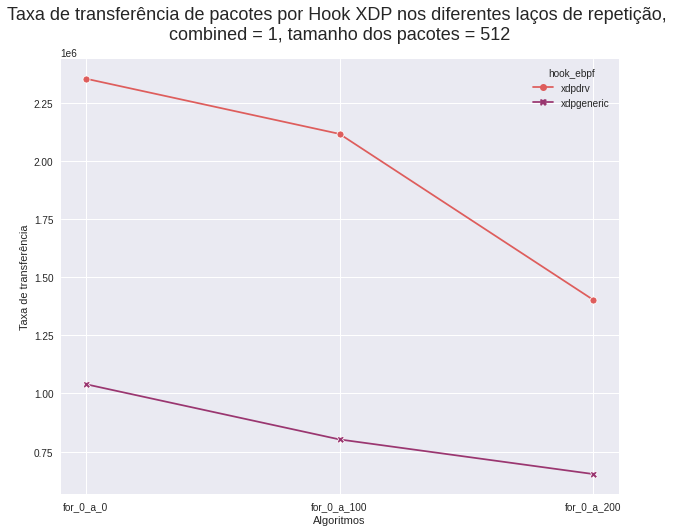

In [86]:
it_combined=1
it_packet_size= 512

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 8))
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.packet_size == it_packet_size]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

plt.rc('figure', figsize=(10, 8))

ax= sns.lineplot(data=df_pergunta1, x=eixo_x, y=eixo_y, hue=hue, 
              style="hook_ebpf", palette="flare", markers=True, dashes=False)
ax.set_title(f'Taxa de transferência de pacotes por Hook XDP nos diferentes laços de repetição, \ncombined = {it_combined}, tamanho dos pacotes = {it_packet_size}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Algoritmos')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/linha_dif_{hue}_para_dif_{eixo_x}@combined_{it_combined}_packet_size_{it_packet_size}{format_imagens}')